<h1 align='center' >Binomial Tree</h1>
<p>
Kannan Singaravelu, CQF <p>
<h2>Binomial Tree</h2>
<p>The binomial tree method was pioneered by Cox, Ross, and Robinstein in 1979. The binomial model allows the stock to move up or down a specific amount over the next time step. Given the initial stock price $S$, we allow it to either go up or down by a factor $u$ and $v$ resulting in the value 
$uS$ and $vS$ after the next time step. Extending this random walk after two time steps, the asset will either be at $u^2S$, if there are two up moves or at $v^2S$ if there are two down moves or at $uvS$ if an up was followed by a down move or vice versa. We can extend this to any number of time step (or branches) depending on how complex you want the model to be or until expiration.

This structure where nodes represent the values taken by the asset is called the binomial tree.</p>

<h2>Import Libraries</h2>
<p>We'll import the required libraries that we'll use in this example.</p>

In [1]:
# Kannan Singaravelu
# https://github.com/kannansingaravelu
# Helper functions to plot binomial tree
# Save the file as '.py' on the same location 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import networkx as nx
import warnings
warnings.filterwarnings('ignore')


# Hard coded for Binomial Plot
n = 4 #hard coded

# Plot Binomial Grid
def binomial_grid(n):

    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    
    nx.draw(G,pos=posG)

# Plot Asset Path - Text 
def plot_asset_path():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'S')

    # Step 1
    plt.figtext(0.3,0.66,'uS')
    plt.figtext(0.3,0.3,'vS')

    # Step 2
    plt.figtext(0.5,0.76,'$u^2S$')
    plt.figtext(0.5,0.55,'uvS')
    plt.figtext(0.5,0.22,'$v^2S$')

    # Step 3
    plt.figtext(0.7,0.86,'$u^3S$')
    plt.figtext(0.7,0.66,'$u^2vS$') 
    plt.figtext(0.7,0.45,'$uv^2S$')
    plt.figtext(0.7,0.11,'$v^3S$')

    # Step 4
    plt.figtext(0.9,0.95,'$u^4S$')
    plt.figtext(0.9,0.75,'$u^3vS$')
    plt.figtext(0.9,0.55,'$u^2v^2S$')
    plt.figtext(0.9,0.35,'$uv^3S$')
    plt.figtext(0.9,0.03,'$v^4S$')

    binomial_grid(n)

# Plot Probability - Text
def plot_probability():

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(0.02,0.49,'1')

    # Step 1
    plt.figtext(0.3,0.66,'p')
    plt.figtext(0.3,0.3,'1-p')

    # Step 2
    plt.figtext(0.5,0.76,'$p^2$')
    plt.figtext(0.5,0.55,'2p(1-p)')
    plt.figtext(0.5,0.20,'$(1-p)^2$')

    # Step 3
    plt.figtext(0.7,0.86,'$p^3$')
    plt.figtext(0.7,0.66,'$3p^2(1-p)$')
    plt.figtext(0.7,0.45,'$3p(1-p)^2$')
    plt.figtext(0.7,0.11,'$(1-p)^3$')

    # Step 4
    plt.figtext(0.9,0.95,'$p^4$')
    plt.figtext(0.9,0.75,'$4p^3(1-p)$')
    plt.figtext(0.9,0.55,'$6p^2(1-p)^2$')
    plt.figtext(0.9,0.35,'$4p(1-p)^3$')
    plt.figtext(0.9,0.00,'$(1-p)^4$')

    binomial_grid(n)

# Plot Price and Option Tree
def plot_binomial_tree(initial_spot, asset_array, option_array, delta_array):

    s = initial_spot
    px = asset_array
    opx = option_array
    delta = delta_array

    plt.figure(figsize=(8, 6))

    # Start
    plt.figtext(-0.07,0.50, 'S = '+str(s))
    plt.figtext(-0.07,0.47, 'V = '+str(opx[0,0]))
    plt.figtext(-0.07,0.44, '$\Delta$ = '+str(delta[0,0]))

    # Step 1
    plt.figtext(0.27,0.73, 'S = '+str(px[0,1]))
    plt.figtext(0.27,0.70, 'V = '+str(opx[0,1]))
    plt.figtext(0.27,0.67, '$\Delta$ = '+str(delta[0,1]))
    plt.figtext(0.27,0.30, 'S = '+str(px[1,1]))
    plt.figtext(0.27,0.27, 'V = '+str(opx[1,1]))
    plt.figtext(0.27,0.24, '$\Delta$ = '+str(delta[1,1]))

    # Step 2
    plt.figtext(0.5,0.84, 'S = '+str(px[0,2]))
    plt.figtext(0.5,0.81, 'V = '+str(opx[0,2]))
    plt.figtext(0.5,0.78, '$\Delta$ = '+str(delta[0,2]))
    plt.figtext(0.5,0.63, 'S = '+str(px[1,2]))
    plt.figtext(0.5,0.60, 'c = '+str(opx[1,2]))
    plt.figtext(0.5,0.57, '$\Delta$ = '+str(delta[1,2]))
    plt.figtext(0.5,0.20, 'S = '+str(px[2,2]))
    plt.figtext(0.5,0.17, 'c = '+str(opx[2,2]))
    plt.figtext(0.5,0.14, '$\Delta$ = '+str(delta[2,2]))

    # Step 3
    plt.figtext(0.7,0.96, 'S = '+str(px[0,3]))
    plt.figtext(0.7,0.93, 'V = '+str(opx[0,3]))
    plt.figtext(0.7,0.90, '$\Delta$ = '+str(delta[0,3]))
    plt.figtext(0.7,0.73, 'S = '+str(px[1,3]))
    plt.figtext(0.7,0.70, 'V = '+str(opx[1,3]))
    plt.figtext(0.7,0.67, '$\Delta$ = '+str(delta[1,3]))
    plt.figtext(0.7,0.50, 'S = '+str(px[2,3]))
    plt.figtext(0.7,0.47, 'V = '+str(opx[2,3]))
    plt.figtext(0.7,0.43, '$\Delta$ = '+str(delta[2,3]))
    plt.figtext(0.7,0.09, 'S = '+str(px[3,3]))
    plt.figtext(0.7,0.06, 'V = '+str(opx[3,3]))
    plt.figtext(0.7,0.03, '$\Delta$ = '+str(delta[3,3]))

    # Step 4
    plt.figtext(0.9,1.05, 'S = '+str(px[0,4]))
    plt.figtext(0.9,1.02, 'V = '+str(opx[0,4]))
    plt.figtext(0.9,0.99, '$\Delta$ = '+str(delta[0,4]))
    plt.figtext(0.9,0.83, 'S = '+str(px[1,4]))
    plt.figtext(0.9,0.80, 'V = '+str(opx[1,4]))
    plt.figtext(0.9,0.77, '$\Delta$ = '+str(delta[1,4]))
    plt.figtext(0.9,0.60, 'S = '+str(px[2,4]))
    plt.figtext(0.9,0.57, 'V = '+str(opx[2,4]))
    plt.figtext(0.9,0.54, '$\Delta$ = '+str(delta[2,4]))
    plt.figtext(0.9,0.39, 'S = '+str(px[3,4]))
    plt.figtext(0.9,0.36, 'V = '+str(opx[3,4]))
    plt.figtext(0.9,0.33, '$\Delta$ = '+str(delta[3,4]))
    plt.figtext(0.9,-0.01, 'S = '+str(px[4,4]))
    plt.figtext(0.9,-0.04, 'V = '+str(opx[4,4]))
    plt.figtext(0.9,-0.07, '$\Delta$ = '+str(delta[4,4]))

    binomial_grid(n)

In [2]:
# Import math functions from NumPy
from numpy import *


<h2>Price Path</h2>
<p>The probability of reaching a particular node in the binomial tree depends on the numbers of distinct paths to that node and the probabilities of the up and down moves. The following figures shows the number of paths to each node and the probability of reaching to that node.</p>

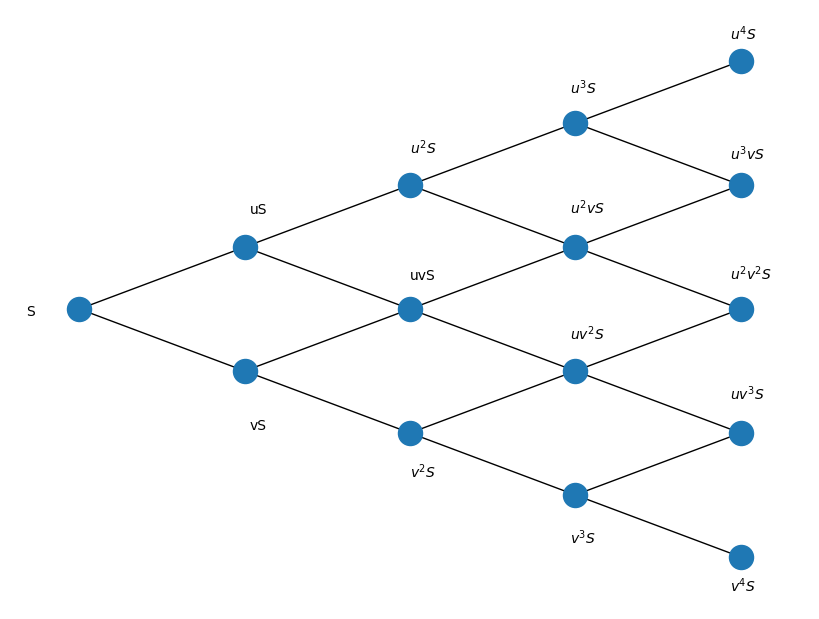

In [3]:
# Plot asset price path
plot_asset_path()

<h2>Path Probability</h2>

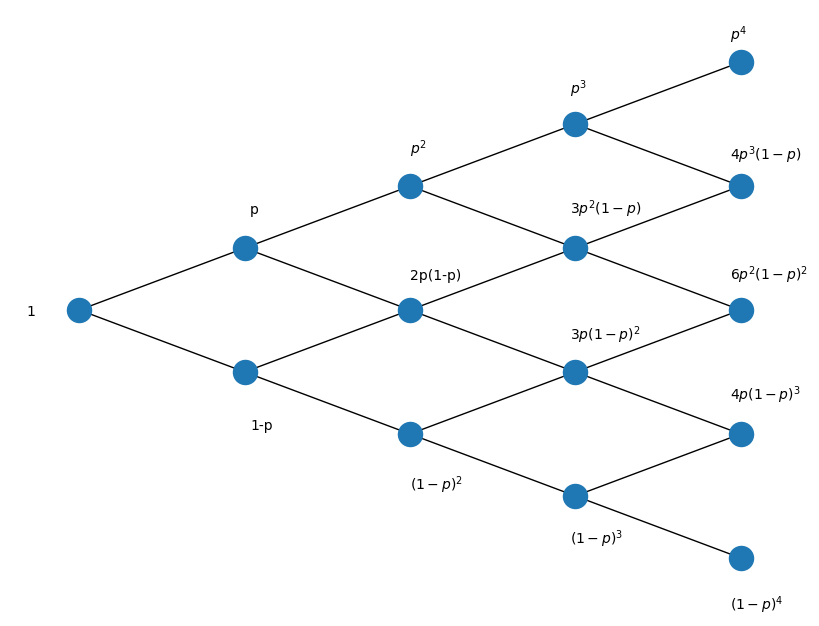

In [4]:
# Plot node probability
plot_probability()


<h2>Risk Neutral Probability</h2>
<p>Risk-neutral measure is a probability measure such that each share price today is the discounted expectations of the share price. From Paul's lecture, we know the formula for u, v, p′ and  V are as follows,<p>

$$u = 1 + σ√δt$$

$$v = 1 − σ√δt$$

The underlying instrument will move up or down by a specific factor u or v per step of the tree where u ≥ 1 and 0 < v ≤ 1.

$$p′ = 1/2 + r√δt2σ$$
where, p′ the risk-neutral probability.
$$V = 1/1 + rδt(p′V^+ +(1 − p′)V^−)$$
where, V is the option value which is present value of some expectation : sum probabilities multiplied by events.

<h2>Building Binomial Tree</h2>
<p>Next, we will build a binomial tree using the risk neutral probability. Building a tree is a multi step process which involves.

Step 1: Draw a n-step tree

Step 2: At the end of n-step, estimate terminal prices

Step 3: Calculate the option value at each node based on the terminal price, exercise price and type

Step 4: Discount it back one step, that is, from n to n-1, according to the risk neutral probability

Step 5: Repeat the previous step until we find the final value at step 0</p>

<h2>Binomial Pricing Model</h2>
<p>Let's now define a binomial option pricing function</p>

In [5]:
# Create a user defined function
def binomial_option(spot: float, strike: float, rate: float, sigma: float, time: float, steps: int, output: int=0)-> ndarray:
    
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    
    Params
    ------
    spot        int or float     - spot price
    strike      int or float     - strike price
    rate        float            - interest rate
    sigma       float            - volatility
    time        int or float     - expiration time
    steps       int              - number of trees
    output      int              - [0: price, 1: payoff, 2: option value, 3: option delta]
    
    Returns
    -------
    out:        ndarray
    An array object of price, payoff, option value and delta specified by the output parameter
    
    """
    
    # params
    ts = time/steps
    u = 1+sigma*sqrt(ts)
    v = 1-sigma*sqrt(ts)
    p = 0.5+rate*sqrt(ts)/(2*sigma)
    df = 1/(1+rate*ts)
    
    # initialize arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))
    
    # binomial loop

    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,i)*power(u,j-i)
            cp[i,j] = maximum(px[i,j] - strike, 0)
 
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]
                if (px[i,j-1]>=strike):
                    d[i,j-1] = 1
                else:
                    d[i,j-1] = 0 
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])

    results = around(px,2), around(cp,2), around(V,2), around(d, 4)
    
    return results[output]

In [6]:
# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [7]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [8]:
# Option price 
opx = binomial_option(100,100,0.05,0.2,1,4,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [85]:
# Option delta
d = binomial_option(100,100,0.05,0.2,1,4,3)
d

KeyboardInterrupt: 

In [82]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 10.29


<h2>Visualize the Binomial Tree</h2>

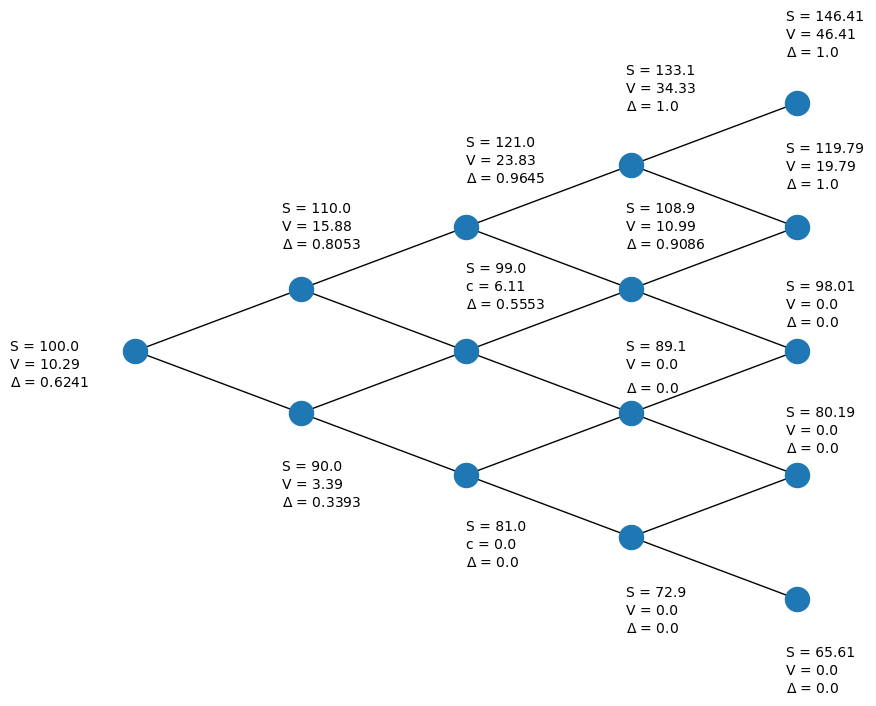

In [83]:
# Plot a 4-Step Binomial Tree 
plot_binomial_tree(px[0,0], px, opx, d)
